In [33]:
pwd

'/home/gray/git_folders/DL/emotion_detection'

In [34]:
import os

base_dir = '../dataset/KDEF_and_AKDEF/KDEF/'
datas = []

for i, j, k in os.walk(base_dir):
    #print(k)
    #print("\n\n\n")
    
    for img in k:
        name = img.split('.')[0]
        Number = name[:4]
        expression = name[4:6]
        angle = name[6:]
        #print(Number, expression, angle)
        switch_expression = {
            "AF": 0,
            "AN": 1,
            "DI": 2,
            "HA": 3,
            "NE": 4,
            "SA": 5,
            "SU": 6
        }
        switch_angle = {
            "FL": 0,
            "FR": 1,
            "HL": 2,
            "HR": 3,
            "S" : 4
        }
        data =  Number + '/' + img + ',' + \
                str(switch_expression[expression]) + ',' + \
                str(switch_angle[angle])
        datas.append(data)
        #print(data)

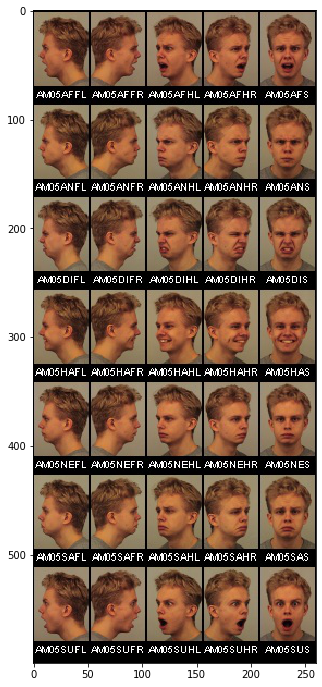

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

mapImg = Image.open('../dataset/KDEF_and_AKDEF/KDEFmap/AM05.JPG')
plt.figure(figsize=(12,12))
plt.imshow(mapImg)

In [36]:
len(datas)

4900

In [37]:
import numpy as np

num_test_samples = 500
num_validation_samples = 500